# Iris Dataset classification using Neural Network

## Importing key libraries

In [1]:
# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# For data visualization
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

Using TensorFlow backend.


In [5]:
df = pd.read_csv('Iris.csv')

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.shape

(150, 6)

In [8]:
#Removing Column ID because it's obsolete
df=df.drop("Id",axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

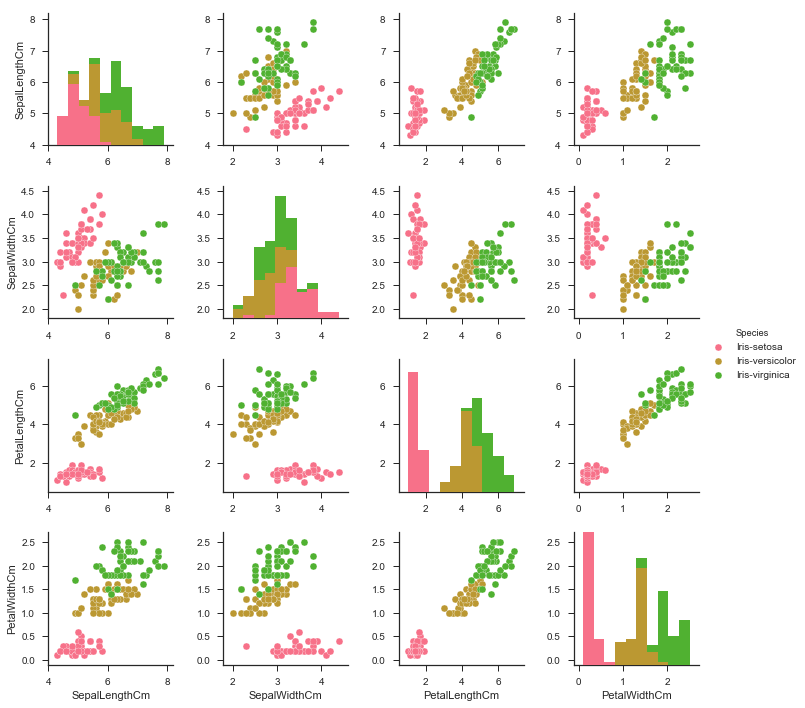

In [40]:
import seaborn as sns
sns.set(style="ticks")
sns.set_palette("husl")
sns.pairplot(df, hue='Species')

In [11]:
#Making x and y
x = df.iloc[:,0:4]
y = df.iloc[:,4]

In [12]:
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [13]:
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [14]:
x[:5]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
y[:5]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

## Splitting x and y as test and train

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.5,random_state=1)

In [17]:
from sklearn.linear_model import LogisticRegression

# train the model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
#make predictions on the testing set
y_pred = logreg.predict(X_test)

In [19]:
# Check accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.92


## One-hot Encoding

In [20]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(X_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [21]:
# keras needs inputs to be vectors , so one hot encoding values
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

y_train_ohe=one_hot_encode_object_array(y_train)
y_test_ohe=one_hot_encode_object_array(y_test)

In [22]:
print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [23]:
y_train_ohe[:5]

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [24]:
y_test_ohe[:5]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [25]:
y_train_ohe.shape, y_test_ohe.shape

((75, 3), (75, 3))

In [26]:
# Creating a model
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [27]:
# Compiling model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


**one input layer with four nodes(input_dim=4), because we are having four attributes in our input values<br>
two hidden layers with ten neurons each<br>
one output layer with three neurons, because we are having three output classes**

## Training model

In [29]:
history=model.fit(X_train,y_train_ohe,validation_data=(X_test, y_test_ohe), epochs=500,batch_size=10,verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 75 samples, validate on 75 samples
Epoch 1/500
75/75 [==============================] - 0s 3ms/step - loss: 1.2624 - acc: 0.3467 - val_loss: 1.3169 - val_acc: 0.3200
Epoch 2/500
75/75 [==============================] - 0s 120us/step - loss: 1.2194 - acc: 0.3467 - val_loss: 1.2754 - val_acc: 0.3200
Epoch 3/500
75/75 [==============================] - 0s 120us/step - loss: 1.1868 - acc: 0.3467 - val_loss: 1.2316 - val_acc: 0.3200
Epoch 4/500
75/75 [==============================] - 0s 120us/step - loss: 1.1510 - acc: 0.3467 - val_loss: 1.1933 - val_acc: 0.3200
Epoch 5/500
75/75 [==============================] - 0s 120us/step - loss: 1.1234 - acc: 0.3467 - val_loss: 1.1568 - val_acc: 0.3200
Epoch 6/500
75/75 [==============================] - 0s 147us/step - loss: 1.0950 - acc: 0.3467 - val_loss: 1.1276 - val_acc: 0.3200
Epoch 7/500
75/75 [==============================] - 0s 134us/step - loss: 1.0715 - acc: 0.3467 - val_loss: 1.09

Epoch 60/500
75/75 [==============================] - 0s 160us/step - loss: 0.6061 - acc: 0.8933 - val_loss: 0.6247 - val_acc: 0.8800
Epoch 61/500
75/75 [==============================] - 0s 134us/step - loss: 0.6035 - acc: 0.9200 - val_loss: 0.6209 - val_acc: 0.8933
Epoch 62/500
75/75 [==============================] - 0s 187us/step - loss: 0.5992 - acc: 0.9067 - val_loss: 0.6179 - val_acc: 0.8800
Epoch 63/500
75/75 [==============================] - 0s 147us/step - loss: 0.5947 - acc: 0.8933 - val_loss: 0.6157 - val_acc: 0.8533
Epoch 64/500
75/75 [==============================] - 0s 160us/step - loss: 0.5917 - acc: 0.8933 - val_loss: 0.6115 - val_acc: 0.8667
Epoch 65/500
75/75 [==============================] - 0s 174us/step - loss: 0.5878 - acc: 0.8933 - val_loss: 0.6080 - val_acc: 0.8533
Epoch 66/500
75/75 [==============================] - 0s 147us/step - loss: 0.5836 - acc: 0.8933 - val_loss: 0.6046 - val_acc: 0.8533
Epoch 67/500
75/75 [==============================] - 0s 120us

75/75 [==============================] - 0s 120us/step - loss: 0.4056 - acc: 0.9067 - val_loss: 0.4345 - val_acc: 0.8800
Epoch 122/500
75/75 [==============================] - 0s 107us/step - loss: 0.4031 - acc: 0.8933 - val_loss: 0.4313 - val_acc: 0.8800
Epoch 123/500
75/75 [==============================] - 0s 107us/step - loss: 0.4002 - acc: 0.9067 - val_loss: 0.4249 - val_acc: 0.8933
Epoch 124/500
75/75 [==============================] - 0s 107us/step - loss: 0.3971 - acc: 0.9200 - val_loss: 0.4224 - val_acc: 0.8933
Epoch 125/500
75/75 [==============================] - 0s 94us/step - loss: 0.3941 - acc: 0.9200 - val_loss: 0.4214 - val_acc: 0.8933
Epoch 126/500
75/75 [==============================] - 0s 107us/step - loss: 0.3917 - acc: 0.9067 - val_loss: 0.4212 - val_acc: 0.8800
Epoch 127/500
75/75 [==============================] - 0s 94us/step - loss: 0.3929 - acc: 0.8933 - val_loss: 0.4147 - val_acc: 0.8933
Epoch 128/500
75/75 [==============================] - 0s 94us/step - l

Epoch 182/500
75/75 [==============================] - 0s 0us/step - loss: 0.2795 - acc: 0.9333 - val_loss: 0.2991 - val_acc: 0.9200
Epoch 183/500
75/75 [==============================] - 0s 208us/step - loss: 0.2809 - acc: 0.9467 - val_loss: 0.3021 - val_acc: 0.9200
Epoch 184/500
75/75 [==============================] - 0s 0us/step - loss: 0.2767 - acc: 0.9333 - val_loss: 0.2950 - val_acc: 0.9200
Epoch 185/500
75/75 [==============================] - 0s 208us/step - loss: 0.2749 - acc: 0.9333 - val_loss: 0.2912 - val_acc: 0.9200
Epoch 186/500
75/75 [==============================] - 0s 208us/step - loss: 0.2761 - acc: 0.9200 - val_loss: 0.2930 - val_acc: 0.9200
Epoch 187/500
75/75 [==============================] - 0s 0us/step - loss: 0.2721 - acc: 0.9333 - val_loss: 0.2892 - val_acc: 0.9200
Epoch 188/500
75/75 [==============================] - 0s 208us/step - loss: 0.2699 - acc: 0.9467 - val_loss: 0.2843 - val_acc: 0.9467
Epoch 189/500
75/75 [==============================] - 0s 0us

75/75 [==============================] - 0s 107us/step - loss: 0.2093 - acc: 0.9467 - val_loss: 0.2137 - val_acc: 0.9600
Epoch 244/500
75/75 [==============================] - 0s 107us/step - loss: 0.2079 - acc: 0.9467 - val_loss: 0.2119 - val_acc: 0.9600
Epoch 245/500
75/75 [==============================] - 0s 107us/step - loss: 0.2071 - acc: 0.9467 - val_loss: 0.2116 - val_acc: 0.9600
Epoch 246/500
75/75 [==============================] - 0s 107us/step - loss: 0.2069 - acc: 0.9333 - val_loss: 0.2094 - val_acc: 0.9600
Epoch 247/500
75/75 [==============================] - 0s 94us/step - loss: 0.2058 - acc: 0.9467 - val_loss: 0.2124 - val_acc: 0.9467
Epoch 248/500
75/75 [==============================] - 0s 120us/step - loss: 0.2056 - acc: 0.9467 - val_loss: 0.2107 - val_acc: 0.9467
Epoch 249/500
75/75 [==============================] - 0s 107us/step - loss: 0.2052 - acc: 0.9467 - val_loss: 0.2084 - val_acc: 0.9600
Epoch 250/500
75/75 [==============================] - 0s 120us/step -

Epoch 304/500
75/75 [==============================] - 0s 94us/step - loss: 0.1691 - acc: 0.9333 - val_loss: 0.1636 - val_acc: 0.9600
Epoch 305/500
75/75 [==============================] - 0s 94us/step - loss: 0.1680 - acc: 0.9333 - val_loss: 0.1627 - val_acc: 0.9600
Epoch 306/500
75/75 [==============================] - 0s 94us/step - loss: 0.1673 - acc: 0.9333 - val_loss: 0.1635 - val_acc: 0.9600
Epoch 307/500
75/75 [==============================] - 0s 94us/step - loss: 0.1671 - acc: 0.9333 - val_loss: 0.1626 - val_acc: 0.9600
Epoch 308/500
75/75 [==============================] - 0s 94us/step - loss: 0.1670 - acc: 0.9333 - val_loss: 0.1669 - val_acc: 0.9600
Epoch 309/500
75/75 [==============================] - 0s 94us/step - loss: 0.1671 - acc: 0.9467 - val_loss: 0.1662 - val_acc: 0.9600
Epoch 310/500
75/75 [==============================] - 0s 94us/step - loss: 0.1659 - acc: 0.9467 - val_loss: 0.1618 - val_acc: 0.9600
Epoch 311/500
75/75 [==============================] - 0s 94us

75/75 [==============================] - 0s 208us/step - loss: 0.1442 - acc: 0.9333 - val_loss: 0.1311 - val_acc: 0.9733
Epoch 366/500
75/75 [==============================] - 0s 0us/step - loss: 0.1438 - acc: 0.9333 - val_loss: 0.1309 - val_acc: 0.9733
Epoch 367/500
75/75 [==============================] - 0s 208us/step - loss: 0.1440 - acc: 0.9333 - val_loss: 0.1325 - val_acc: 0.9733
Epoch 368/500
75/75 [==============================] - 0s 0us/step - loss: 0.1433 - acc: 0.9333 - val_loss: 0.1327 - val_acc: 0.9733
Epoch 369/500
75/75 [==============================] - 0s 208us/step - loss: 0.1428 - acc: 0.9333 - val_loss: 0.1350 - val_acc: 0.9600
Epoch 370/500
75/75 [==============================] - 0s 0us/step - loss: 0.1428 - acc: 0.9333 - val_loss: 0.1325 - val_acc: 0.9600
Epoch 371/500
75/75 [==============================] - 0s 208us/step - loss: 0.1432 - acc: 0.9333 - val_loss: 0.1327 - val_acc: 0.9600
Epoch 372/500
75/75 [==============================] - 0s 0us/step - loss: 

75/75 [==============================] - 0s 0us/step - loss: 0.1282 - acc: 0.9333 - val_loss: 0.1140 - val_acc: 0.9733
Epoch 427/500
75/75 [==============================] - 0s 208us/step - loss: 0.1292 - acc: 0.9333 - val_loss: 0.1126 - val_acc: 0.9733
Epoch 428/500
75/75 [==============================] - 0s 0us/step - loss: 0.1274 - acc: 0.9333 - val_loss: 0.1119 - val_acc: 0.9733
Epoch 429/500
75/75 [==============================] - 0s 0us/step - loss: 0.1276 - acc: 0.9333 - val_loss: 0.1121 - val_acc: 0.9733
Epoch 430/500
75/75 [==============================] - 0s 0us/step - loss: 0.1327 - acc: 0.9333 - val_loss: 0.1208 - val_acc: 0.9600
Epoch 431/500
75/75 [==============================] - 0s 0us/step - loss: 0.1263 - acc: 0.9467 - val_loss: 0.1136 - val_acc: 0.9733
Epoch 432/500
75/75 [==============================] - 0s 155us/step - loss: 0.1266 - acc: 0.9333 - val_loss: 0.1054 - val_acc: 0.9867
Epoch 433/500
75/75 [==============================] - 0s 107us/step - loss: 0.

75/75 [==============================] - 0s 80us/step - loss: 0.1190 - acc: 0.9467 - val_loss: 0.0909 - val_acc: 0.9867
Epoch 488/500
75/75 [==============================] - 0s 94us/step - loss: 0.1189 - acc: 0.9333 - val_loss: 0.0959 - val_acc: 0.9867
Epoch 489/500
75/75 [==============================] - 0s 80us/step - loss: 0.1165 - acc: 0.9333 - val_loss: 0.0987 - val_acc: 0.9733
Epoch 490/500
75/75 [==============================] - 0s 107us/step - loss: 0.1190 - acc: 0.9467 - val_loss: 0.1058 - val_acc: 0.9600
Epoch 491/500
75/75 [==============================] - 0s 94us/step - loss: 0.1189 - acc: 0.9333 - val_loss: 0.0967 - val_acc: 0.9733
Epoch 492/500
75/75 [==============================] - 0s 80us/step - loss: 0.1159 - acc: 0.9333 - val_loss: 0.0995 - val_acc: 0.9733
Epoch 493/500
75/75 [==============================] - 0s 94us/step - loss: 0.1176 - acc: 0.9467 - val_loss: 0.1024 - val_acc: 0.9600
Epoch 494/500
75/75 [==============================] - 0s 94us/step - loss:

In [30]:
y_pred = model.predict(X_test)

In [31]:
y_pred[:5]

array([[9.9999118e-01, 8.8336847e-06, 4.2409522e-13],
       [9.7138677e-03, 9.8863608e-01, 1.6501012e-03],
       [1.2334171e-03, 9.9535573e-01, 3.4109110e-03],
       [9.9997556e-01, 2.4432833e-05, 5.6456025e-12],
       [2.3601875e-02, 6.0603940e-01, 3.7035874e-01]], dtype=float32)

In [32]:
y_test_ohe[:5]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [33]:
y_test_class = np.argmax(y_test_ohe,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.92      1.00      0.96        24
           2       1.00      0.93      0.96        27

   micro avg       0.97      0.97      0.97        75
   macro avg       0.97      0.98      0.97        75
weighted avg       0.98      0.97      0.97        75



In [35]:
print(confusion_matrix(y_test_class,y_pred_class))

[[24  0  0]
 [ 0 24  0]
 [ 0  2 25]]


In [36]:
loss, accuracy = model.evaluate(X_train, y_train_ohe, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))

Training Accuracy: 0.9333
Training Loss: 0.1145


In [37]:
loss, accuracy = model.evaluate(X_test, y_test_ohe, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Loss:  {:.4f}".format(loss))

Testing Accuracy:  0.9733
Testing Loss:  0.0952


**Our train accuracy score is 97 and test accuracy score is same 94.**

In [38]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

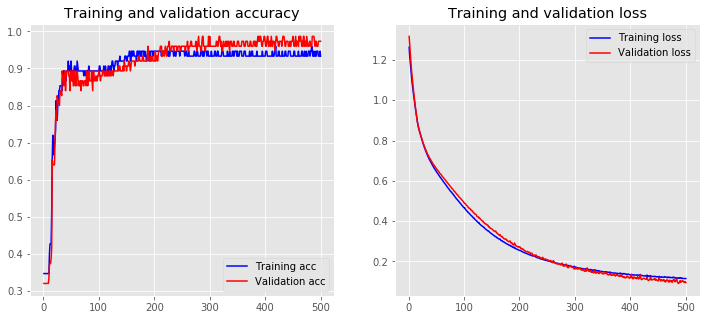

In [39]:
plot_history(history)